In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [52]:
dataset=pd.read_csv("Position_Salaries.csv")
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
print(dataset)
print(dataset.info())

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None


In [53]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [54]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [55]:
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [56]:
y_pred=regressor.predict(X)
y_pred

array([ 46000.,  49000.,  59000.,  74000., 101000., 136000., 210000.,
       305000., 470000., 850000.])

In [57]:
regressor.predict([[6.5]])

array([167000.])

In [58]:
from sklearn.metrics import r2_score
acc=r2_score(y,y_pred)
acc*100

97.04434230386582

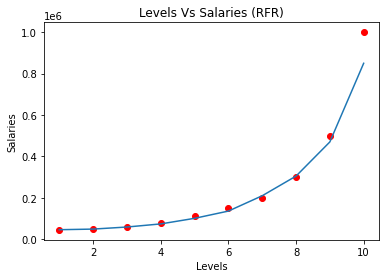

In [59]:
plt.scatter(X,y,color='red')
plt.plot(X,y_pred)
plt.title('Levels Vs Salaries (RFR)')
plt.xlabel('Levels')
plt.ylabel('Salaries')
plt.show()

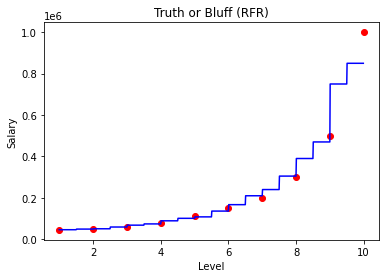

In [60]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict((X_grid)), color = 'blue')
plt.title('Truth or Bluff (RFR)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()